In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
football_df = pd.read_csv('./UCLQuarterFinals.csv')

In [3]:
football_df

,year,code,name,round,league,region,decade,superliga,city,areacode,metropol,pop,gdp,country,eurostat,ecb,cowc,cown
0,1981,LIV,Liverpool FC,W,England,Big 5,1980s,Yes,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
1,1981,MAD,Real Madrid CF,RU,Spain,Big 5,1980s,Yes,Madrid,ES001,Madrid,6791667.0,342534.0,Spain,ES,ES,SPN,230.0
2,1981,BMN,FC Bayern,SF,Germany,Big 5,1980s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
3,1981,INT,FC Inter Milan,SF,Italy,Big 5,1980s,Yes,Milano,IT002,Milan,5145657.0,301366.0,Italy,IT,IT,ITA,325.0
4,1981,BEL,Red Star,QF,Serbia,East,1980s,No,Belgrade,Belgrade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2021,PSG,Paris SG,SF,France,Big 5,2010s,No,Paris,FR001,Paris,12914803.0,913737.0,France,FR,FR,FRN,220.0
324,2021,LIV,Liverpool FC,QF,England,Big 5,2010s,Yes,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
325,2021,BMN,FC Bayern,QF,Germany,Big 5,2010s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
326,2021,POR,FC Porto,QF,Portugal,Small,2010s,No,Porto,PT002,Porto,1272189.0,38974.0,Portugal,PT,PT,POR,235.0


In [4]:
football_df.shape

(328, 18)

In [5]:
dup_df = football_df.drop_duplicates()

assert len(dup_df) == len(football_df)

In [6]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       328 non-null    int64  
 1   code       328 non-null    object 
 2   name       328 non-null    object 
 3   round      328 non-null    object 
 4   league     328 non-null    object 
 5   region     328 non-null    object 
 6   decade     328 non-null    object 
 7   superliga  328 non-null    object 
 8   city       328 non-null    object 
 9   areacode   328 non-null    object 
 10  metropol   294 non-null    object 
 11  pop        294 non-null    float64
 12  gdp        289 non-null    float64
 13  country    319 non-null    object 
 14  eurostat   319 non-null    object 
 15  ecb        319 non-null    object 
 16  cowc       319 non-null    object 
 17  cown       319 non-null    float64
dtypes: float64(3), int64(1), object(14)
memory usage: 46.2+ KB


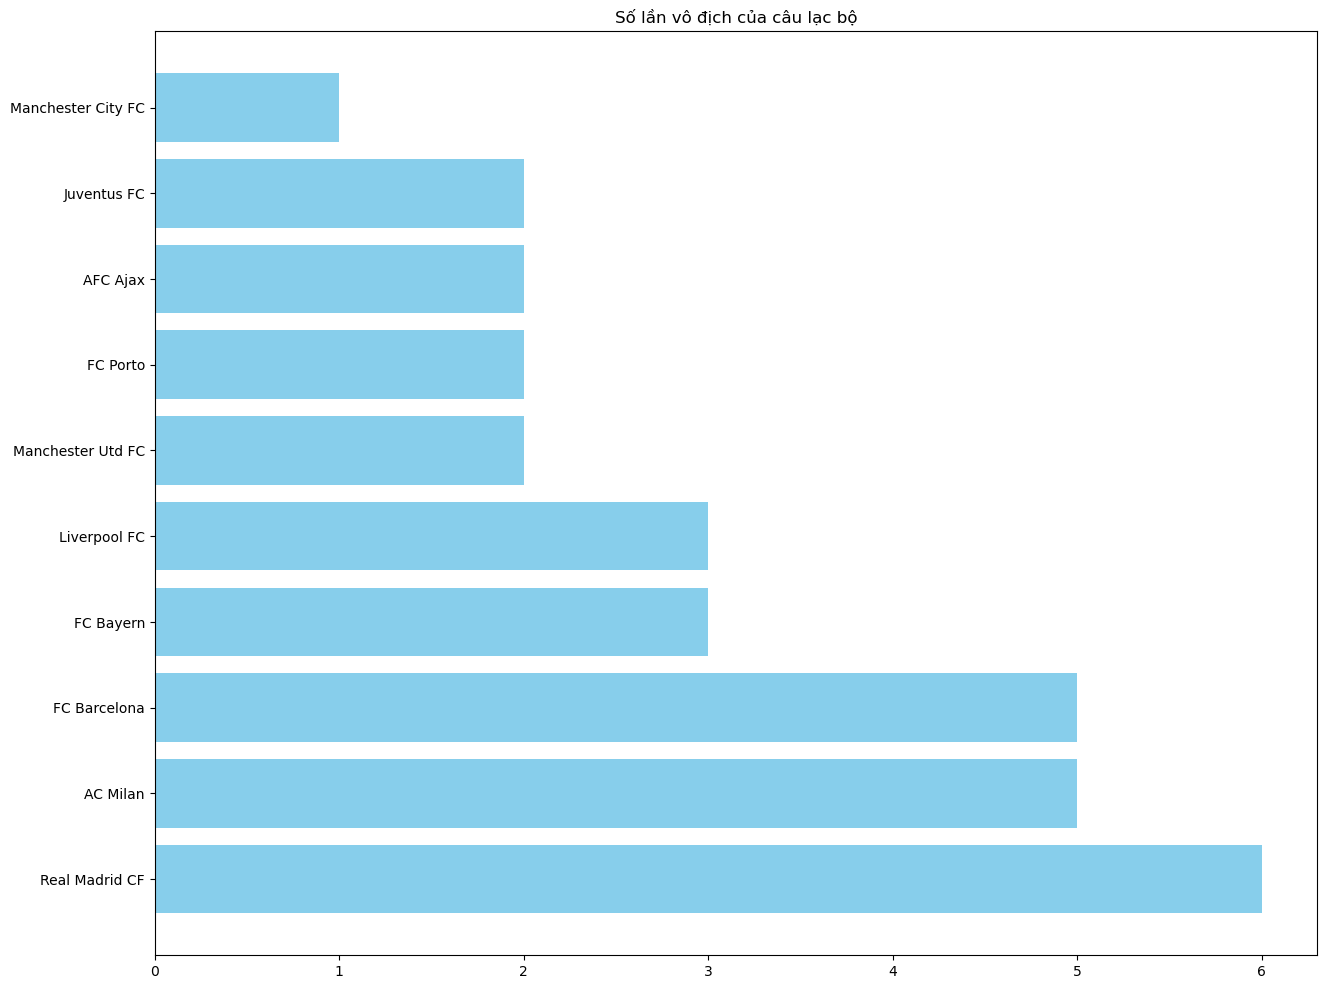

In [12]:
df = football_df[football_df['round']=='W'].groupby('name').count()['year'].sort_values(ascending=False).head(10)
# Data
categories = df.index
values = df.values

plt.figure(figsize=(15,12))

# Create horizontal bar chart
plt.barh(categories, values, color='skyblue')

# Add labels and title
#plt.xlabel('Values')
#plt.ylabel('Categories')
plt.title('Số lần vô địch của câu lạc bộ')

# Show the plot
plt.savefig("myimg1.svg")

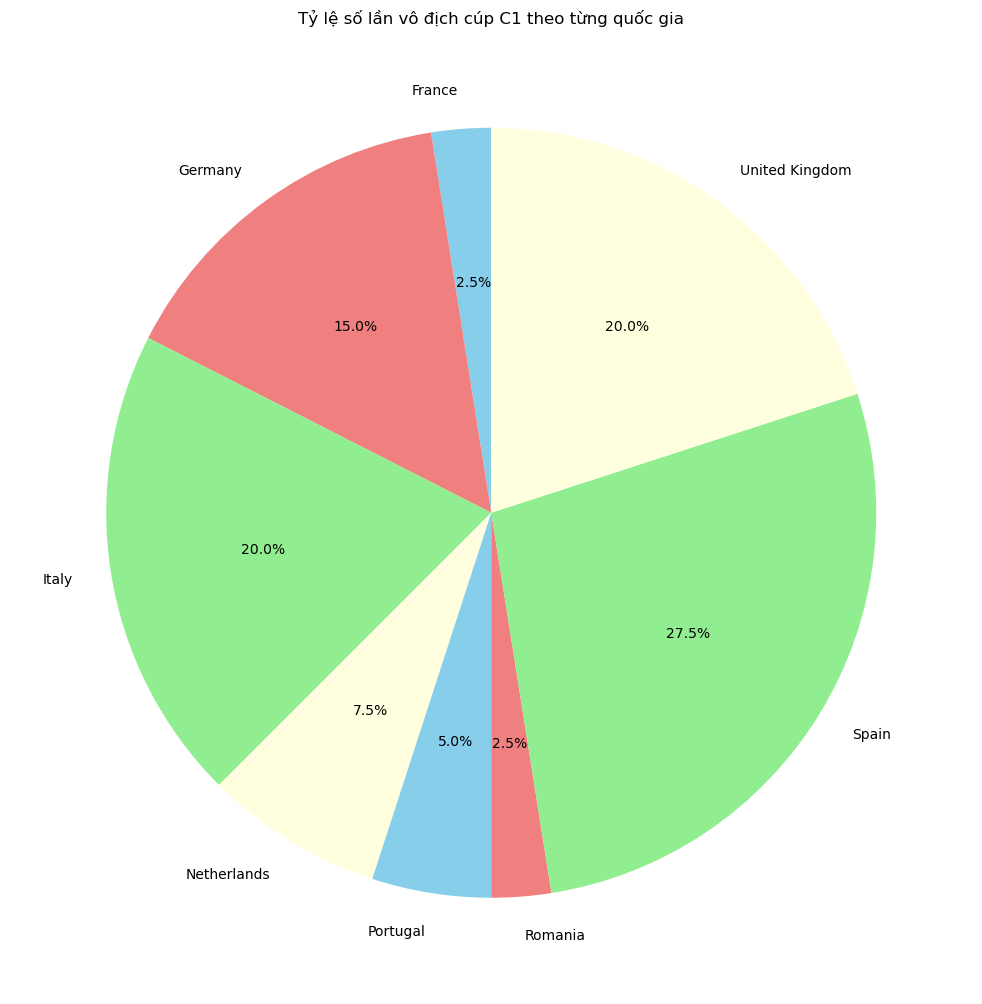

In [8]:
df = football_df[football_df['round']=='W'].groupby('country').count()['year'].to_frame()

plt.figure(figsize=(12.5,12.5))

# Create a pie chart
plt.pie(df['year'], labels=df.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightyellow'])

# Add a title
plt.title('Tỷ lệ số lần vô địch cúp C1 theo từng quốc gia')

# Show the plot
plt.savefig("myimg2.svg")